In [2]:
from __future__ import print_function
from __future__ import division
import random
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms, utils
from CubeDataset import CubeDataset
import transforms
from transforms_custom import Rescale, ToTensor
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.keypoint_rcnn import KeypointRCNNPredictor
from engine import train_one_epoch
import utils
import vis

plt.ion()

## Dataset

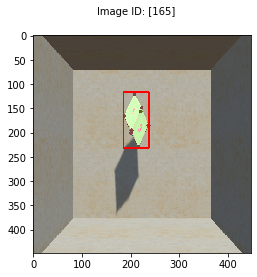

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2

dataset = CubeDataset('data/keypoints_data', transforms.Compose([Rescale(448), ToTensor()]))

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

idx = random.randint(0, len(dataset)-1)

vis.vis_one(dataset[idx][0], dataset[idx][1])

## Model

In [ ]:
# get pretrained model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

# reinitialize roi_heads for box predictor and keypoint predictor
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.roi_heads.keypoint_predictor = KeypointRCNNPredictor(512, 8)

# eventually load pretrained model
#model.load_state_dict(torch.load('model', map_location=device))

model.to(device);

## Optimizer, scheduler

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=0.008, momentum=0.9, weight_decay=0.0005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

## Training

In [6]:
num_of_epochs = 10

for epoch in range(num_of_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)

    lr_scheduler.step()

torch.save(model.state_dict(), 'model')

Epoch: [0]  [  0/484]  eta: 6:35:36  lr: 0.000025  loss: 2.0606 (2.0606)  loss_classifier: 0.0092 (0.0092)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.0488 (2.0488)  loss_objectness: 0.0003 (0.0003)  loss_rpn_box_reg: 0.0010 (0.0010)  time: 49.0418  data: 3.5848


KeyboardInterrupt: 